# Dogs and bagels
![dogs and bagels cover image](dogs_bagels.jpg)
Voor mijn open program was ik op zoek naar een opdracht die ik leuk vond om te maken. Toen ik op zoek was ben ik een leuke video tegen gekomen waar iemand een machine learning model traint om bagels en honden te onderscheiden. Dit vond ik erg interessant en is ook iets wat ik wilde doen voor mijn project in het open program.

In [35]:
import copy, pathlib, math
import PIL.Image as Image

import sklearn
import numpy
import matplotlib
import matplotlib.pyplot as plt

print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("numpy version:", numpy.__version__)              # 1.23.4
print("matplotlib version:", matplotlib.__version__)    # 3.6.2

scikit-learn version: 1.0.2
numpy version: 1.21.5
matplotlib version: 3.5.2


# Data
De dat die ik gebruikt heb is deels van de omslag foto van dit notebook, deze fotos heb ik opgedeeld in evenredige 4x4 vlakken. Hier heb ik dus 16 fotos van gemaakt. Dit vond ik niet genoeg om een model op los te laten dus, heb ik 12 fotos van honden en 12 fotos van bagels van het internet gehaald. Deze heb ik uitgezocht dat ze vierkant zijn en dat ze vergelijkbare achtergronden hebben. Deze fotos heb ik in een mapje gezet en heb ik de code hieronder gebruikt om de fotos in te laden.

In [36]:
size = 256

def load_image(file, size):
    img = Image.open(file)
    img = img.resize((size, size))
    return numpy.array(img).flatten()

def load_labelled_images(path, size):
    labels = list()
    files = list()
    for file_info in [x for x in pathlib.Path(path).glob("**/**/*.jpg")]:
        labels.append(file_info.parts[1])
        files.append(str(file_info))
    imgs = numpy.array([load_image(f, size) for f in files])
    return imgs, numpy.array(labels)

images, labels = load_labelled_images("./data", size)
print("Loaded", len(images), "images in the following", len(numpy.unique(labels)), "classes:")
for label in numpy.unique(labels):
    print(label)

Loaded 40 images in the following 2 classes:
bagels
dogs


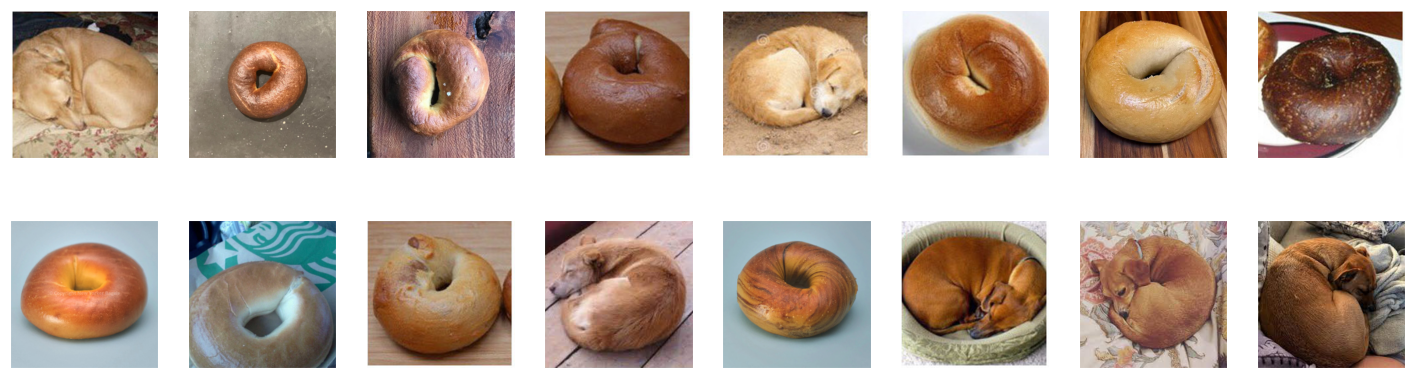

In [37]:
sample_size = 16


plotimgs = copy.deepcopy(images)
numpy.random.shuffle(plotimgs)
rows = plotimgs[:sample_size]

_, subplots = plt.subplots(nrows = math.ceil(sample_size/8), ncols = 8, figsize=(18, int(sample_size/3)))
subplots = subplots.flatten()
for i, x in enumerate(rows):
    subplots[i].imshow(numpy.reshape(x, [size, size, 3]))
    subplots[i].set_xticks([])
    subplots[i].set_yticks([])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=.3, random_state=0)

In [39]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.4166666666666667


In [40]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

      bagels       0.40      0.80      0.53         5
        dogs       0.50      0.14      0.22         7

    accuracy                           0.42        12
   macro avg       0.45      0.47      0.38        12
weighted avg       0.46      0.42      0.35        12



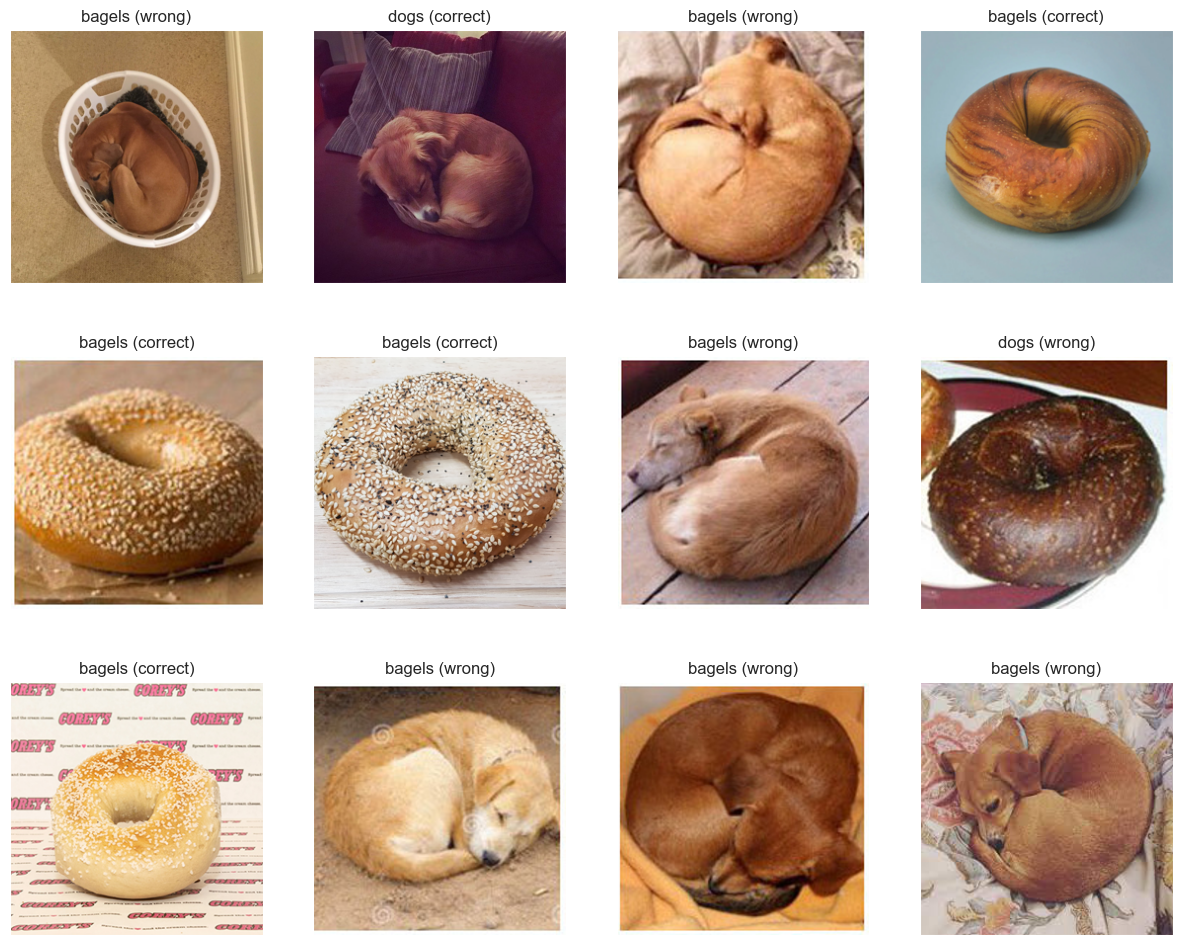

In [41]:
_, subplots = plt.subplots(nrows = math.ceil(len(X_test)/4), ncols = 4, figsize=(15, len(X_test)))
subplots = subplots.flatten()

for i, x in enumerate(X_test):
    subplots[i].imshow(numpy.reshape(x, [size, size, 3]))
    subplots[i].set_xticks([])
    subplots[i].set_yticks([])
    subplots[i].set_title(predictions[i] + (" (correct)" if predictions[i] == y_test[i] else " (wrong)"))